## 1. Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv('/Users/rohanpatil/Desktop/ai_ml_projects/project_1/data/Ames_Housing_Data.csv')

In [4]:
data.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [150]:
data['Sale Condition'].value_counts()

Sale Condition
Normal     2413
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: count, dtype: int64

<Axes: xlabel='Sale Condition'>

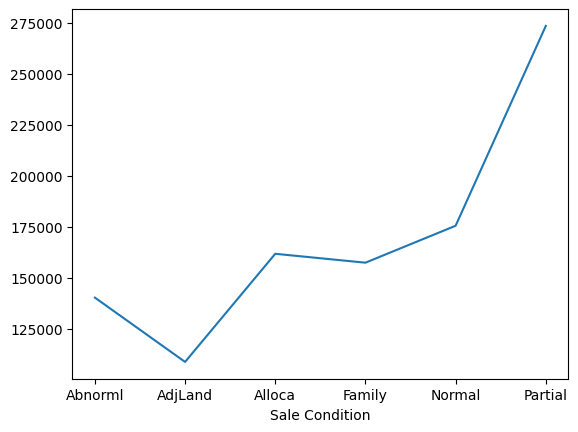

In [154]:
data.groupby(['Sale Condition'])['SalePrice'].mean().plot(kind='line'    )

<Axes: xlabel='Sale Condition', ylabel='SalePrice'>

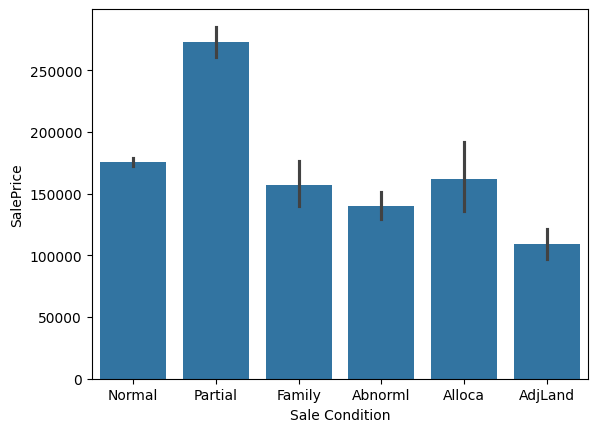

In [155]:
sns.barplot(x='Sale Condition', y='SalePrice', data=data)

In [7]:
data.isna().sum().sort_values(ascending=False).head(5)

Pool QC         2917
Misc Feature    2824
Alley           2732
Fence           2358
Mas Vnr Type    1775
dtype: int64

# > 50% - drop the column

In [8]:
drop_columns = ['Pool QC','Misc Feature', 'Alley', 'Fence','Mas Vnr Type','Fireplace Qu']


cleaned_data = data.drop(columns=drop_columns)

In [9]:
cleaned_data.isna().sum().sort_values(ascending=False).head(5)

Lot Frontage     490
Garage Cond      159
Garage Yr Blt    159
Garage Finish    159
Garage Qual      159
dtype: int64

### 3. Feature Engineering 

### Dealing with missing values : 1) mean 2) median 3) Interpolate

In [10]:
cleaned_data['Lot Frontage']

0       141.0
1        80.0
2        81.0
3        93.0
4        74.0
        ...  
2925     37.0
2926      NaN
2927     62.0
2928     77.0
2929     74.0
Name: Lot Frontage, Length: 2930, dtype: float64

In [11]:
mean_lot_front = cleaned_data['Lot Frontage'].mean()
mean_lot_front

69.22459016393442

In [12]:
median_lot_front = cleaned_data['Lot Frontage'].median()

In [13]:
cleaned_data['Lot Frontage'].fillna(mean_lot_front, inplace=True)

In [14]:
cleaned_data['Lot Frontage'].isna().sum()

0

### 3.1 Outliers Removal

<Axes: ylabel='Frequency'>

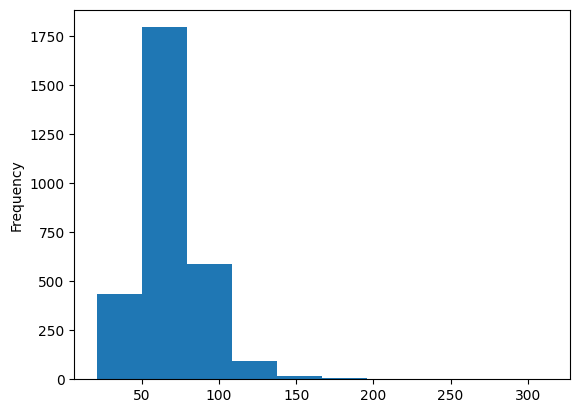

In [15]:
cleaned_data['Lot Frontage'].plot(kind='hist')

<Axes: ylabel='Lot Frontage'>

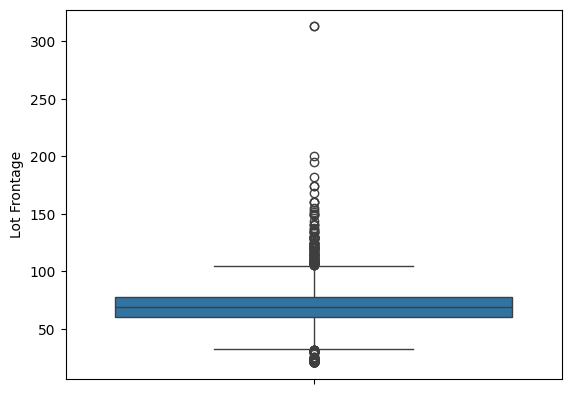

In [16]:
sns.boxplot(cleaned_data['Lot Frontage'])

## 1K , 1.5K , 2K + 5000K


## IQR = q3(75%) - q1(25%)

## lower fence = q1 - 1.5 * IQR  -> 22

## 58 - 1.5 * (22)


## upper fence = q3 + 1.5 * IQR -> 110

In [17]:
# values < 25 and values > 110 : outliers

In [18]:
cleaned_data[( cleaned_data['Lot Frontage'] < 110 ) & ( cleaned_data['Lot Frontage'] > 25 )]

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,...,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1,526350040,20,RH,80.00000,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.00000,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.00000,11160,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.00000,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189900
5,527105030,60,RL,78.00000,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2010,WD,Normal,195500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,923275080,80,RL,37.00000,7937,Pave,IR1,Lvl,AllPub,CulDSac,...,0,0,0,0,0,3,2006,WD,Normal,142500
2926,923276100,20,RL,69.22459,8885,Pave,IR1,Low,AllPub,Inside,...,0,0,0,0,0,6,2006,WD,Normal,131000
2927,923400125,85,RL,62.00000,10441,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,700,7,2006,WD,Normal,132000
2928,924100070,20,RL,77.00000,10010,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,4,2006,WD,Normal,170000


In [19]:
data['Lot Frontage'].describe()

count    2440.000000
mean       69.224590
std        23.365335
min        21.000000
25%        58.000000
50%        68.000000
75%        80.000000
max       313.000000
Name: Lot Frontage, dtype: float64

In [20]:
(1 + 1.5 + 2 + 5000)/4

1251.125

In [21]:
cleaned_data['Garage Cond'].unique()

array(['TA', nan, 'Fa', 'Gd', 'Ex', 'Po'], dtype=object)

In [22]:
cleaned_data['Garage Cond'].value_counts()

Garage Cond
TA    2665
Fa      74
Gd      15
Po      14
Ex       3
Name: count, dtype: int64

In [23]:
gara_cond_mode = cleaned_data['Garage Cond'].mode()[0]

In [24]:
cleaned_data['Garage Cond'].fillna(gara_cond_mode, inplace=True)

In [25]:
cleaned_data['Garage Yr Blt'] = cleaned_data['Garage Yr Blt'].astype('object')

In [26]:
mode_garage_yr_blt = cleaned_data['Garage Yr Blt'].mode()[0]

In [27]:
cleaned_data['Garage Yr Blt'].fillna(mode_garage_yr_blt, inplace=True)

In [28]:
mode_garage_finish = cleaned_data['Garage Finish'].mode()[0]

In [29]:
cleaned_data['Garage Finish'].fillna(mode_garage_finish, inplace=True)

In [30]:
cleaned_data['Garage Qual'].fillna('TA', inplace=True)

In [31]:
cleaned_data['Lot Frontage'].fillna(cleaned_data['Lot Frontage'].mean(), inplace=True)

In [32]:
cleaned_data.isna().sum()

PID               0
MS SubClass       0
MS Zoning         0
Lot Frontage      0
Lot Area          0
                 ..
Mo Sold           0
Yr Sold           0
Sale Type         0
Sale Condition    0
SalePrice         0
Length: 75, dtype: int64

In [33]:
# Qualitative /Categorical Data : Nominal and Ordinal

# Year Built  : 1990,1991

In [46]:
cleaned_data_transformed = pd.get_dummies(cleaned_data, drop_first=True)

## 4. Model Building

In [35]:
cleaned_data.drop('PID', axis=1, inplace=True)

In [44]:
cleaned_data.isna().sum().sort_values(ascending=False).head(5)

Garage Type       157
Bsmt Exposure      83
BsmtFin Type 2     81
Bsmt Qual          80
Bsmt Cond          80
dtype: int64

In [45]:
cleaned_data.dropna(inplace=True)

In [47]:
cleaned_data_transformed

,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,20,141.00000,31770,6,5,1960,1960,112.0,639.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.00000,11622,5,6,1961,1961,0.0,468.0,144.0,...,False,False,False,False,True,False,False,False,True,False
2,20,81.00000,14267,6,6,1958,1958,108.0,923.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,20,93.00000,11160,7,5,1968,1968,0.0,1065.0,0.0,...,False,False,False,False,True,False,False,False,True,False
4,60,74.00000,13830,5,5,1997,1998,0.0,791.0,0.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2924,20,160.00000,20000,5,7,1960,1996,0.0,1224.0,0.0,...,False,False,False,False,True,False,False,False,False,False
2925,80,37.00000,7937,6,6,1984,1984,0.0,819.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2926,20,69.22459,8885,5,5,1983,1983,0.0,301.0,324.0,...,False,False,False,False,True,False,False,False,True,False
2928,20,77.00000,10010,5,5,1974,1975,0.0,1071.0,123.0,...,False,False,False,False,True,False,False,False,True,False


In [48]:
target_col = 'SalePrice'

In [49]:
Features = cleaned_data_transformed.drop('SalePrice', axis=1)
target = cleaned_data_transformed['SalePrice'].values

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Features, target, test_size=0.3, random_state=101)

Xtrain -> 10, 21, 34, 

## 1. Linear Regression

In [92]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [93]:
y_test

array([107900, 179665, 201000, 144000, 205000, 200000, 212500, 139000,
       189900, 269500, 145000, 328000, 122000, 286000, 153000, 372500,
       165000, 161900, 179200, 125000, 184500, 240000, 295493, 275000,
       136870, 161750,  99500, 221000, 122000, 103500, 239000, 250000,
       170000, 373000, 165250, 148000, 129000, 141000,  99500, 134000,
       146300, 130000, 370000, 140750, 160000, 114000, 107500, 202000,
       181000, 128000, 134800, 387000, 325000, 148800, 156500, 252000,
       130000, 165000, 143000,  80000, 156500, 193000,  71000, 175000,
       274000, 209500, 148000, 189000, 169000, 121600, 172400, 138500,
       141500, 140000, 190000, 299800, 260400, 186000, 132000,  82000,
       320000, 239500, 167000, 226000, 151000, 174000, 209000, 170000,
       123500, 175000, 187500, 325000, 171000, 165150, 584500, 114900,
       103000, 323262, 167300, 171000, 204000, 151500, 152000, 153000,
       270000, 115000, 122500,  99500, 185000, 118500, 340000, 148000,
      

In [94]:
y_pred = model.predict(X_test)

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [100]:
mean_absolute_error(y_test, y_pred)

16439.777546996465

In [101]:
mean_squared_error(y_pred, y_test)

1129561054.7752843

In [102]:
r2_score(y_test, y_pred) # closer to 1 

0.7850225869688401

## 2. Decision Tree

In [103]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_model = DecisionTreeRegressor()


decision_tree_model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [104]:
y_pred_tree = decision_tree_model.predict(X_test)

In [105]:
mean_absolute_error(y_test, y_pred)

16439.777546996465

In [106]:
mean_squared_error(y_test, y_pred_tree)

1773274828.079602

In [107]:
r2_score(y_test, y_pred_tree) # closer to 1

0.6625113502964506

## 3. Random Forest

In [108]:
from sklearn.ensemble import RandomForestRegressor

model_random_forest = RandomForestRegressor()

model_random_forest.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [109]:
y_pred_random_forest = model_random_forest.predict(X_test)

In [110]:
mean_squared_error(y_test, y_pred_random_forest)    

859037277.1751231

In [111]:
mean_absolute_error(y_test, y_pred_random_forest)

16059.419096185738

In [112]:
r2_score(y_test, y_pred_random_forest) # closer to 1

0.8365085173893689

## 4. Gradient Boosting

In [113]:
from sklearn.ensemble import GradientBoostingRegressor

model_gradient_boosting = GradientBoostingRegressor()

model_gradient_boosting.fit(X_train, y_train)

,loss,'squared_error'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [114]:
y_pred_gradient_boosting = model_gradient_boosting.predict(X_test)

In [115]:
mean_squared_error(y_test, y_pred_gradient_boosting)

726814489.036985

In [116]:
mean_absolute_error(y_test, y_pred_gradient_boosting)

14804.08671199456

In [117]:
r2_score(y_test, y_pred_gradient_boosting) # closer to 1

0.8616730827021832

### MLOps 

## DataBase -> Data Warehouse ( Departments : HR , Marketing, ML Engineerings)

## Data Engineer : Data in the databases | AWS codepiplines | Jenkins | 

## Data Scientist : 1) Data Ingestion (Airflow) -> 2) Data Preprocessing -> 3) Feature Engineering -> 4) Modeling (Github Action)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Define the steps
steps = [
    ('')
    ('one_hot_encoder', pd.get_dummies(cleaned_data, drop_first=True)),
    ('scaler', StandardScaler()),
    # ('model', DecisionTreeRegressor())
]

# Create the pipeline
pipeline = Pipeline(steps)

# Example usage (assuming X_train, y_train, X_test exist)
# pipeline.fit(X_train, y_train)
# predictions = pipeline.predict(X_test)


In [ ]:
# pickle AWS : S3 bucket
# ApiGateway : API's  | POST \ Get -> predictions 

In [ ]:
# Version 1 : Jan 2024 -> Dec 2024 model_version_1.pkl
# Version 2 : Jan 2025 -> May 2025 model_version_2.pkl 
# Version 3 : Junly 2025

30,000

In [147]:
data.columns

Index(['PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Alley', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config',
       'Land Slope', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area', 'Exter Qual',
       'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure',
       'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2', 'BsmtFin SF 2',
       'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air',
       'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
       'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
       'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
       'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish'

In [156]:
!pip3 install fastapi


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip3 install --upgrade pip
